In [3]:
### uncommnet these if this is the first time you use these packages ####
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn
# !pip install seaborn
# !pip install pyod
# !pip install PiML

In [4]:
# mute warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Data set
**We're going to use the Motor Trends Cars ("mtcars") data set that is built into the R programming language.**
```
mpg - Miles per Gallon
cyl - # of cylinders
disp - displacement, in cubic inches
hp - horsepower
drat - driveshaft ratio
wt - weight
qsec - 1/4 mile time; a measure of acceleration
vs - 'V' or straight - engine shape
am - transmission; auto or manual
gear - # of gears
carb - # of carburetors.
```

In [5]:
# Load the dataset
df = pd.read_csv(r"data/mtcars.csv")
# Here we are going to use the "model" of the car as a the index to our dataframe
df.set_index('model', inplace=True)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
# Descriptive statistics
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:
# Check whether there are any missing values
df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [8]:
# Heatmap based on standardized values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
# scaled_df.abs().sum(axis=1)
df.style.background_gradient(cmap ='coolwarm', gmap=scaled_df, axis=None, vmin=-3, vmax=3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.000000,6,160.000000,110,3.900000,2.620000,16.460000,0,1,4,4
Mazda RX4 Wag,21.000000,6,160.000000,110,3.900000,2.875000,17.020000,0,1,4,4
Datsun 710,22.800000,4,108.000000,93,3.850000,2.320000,18.610000,1,1,4,1
Hornet 4 Drive,21.400000,6,258.000000,110,3.080000,3.215000,19.440000,1,0,3,1
Hornet Sportabout,18.700000,8,360.000000,175,3.150000,3.440000,17.020000,0,0,3,2
Valiant,18.100000,6,225.000000,105,2.760000,3.460000,20.220000,1,0,3,1
Duster 360,14.300000,8,360.000000,245,3.210000,3.570000,15.840000,0,0,3,4
Merc 240D,24.400000,4,146.700000,62,3.690000,3.190000,20.000000,1,0,4,2
Merc 230,22.800000,4,140.800000,95,3.920000,3.150000,22.900000,1,0,4,2


# Use regression models to predict fuel comsumption(mpg)

In [9]:
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### split the dataset into training and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:], df.iloc[:,0], test_size=0.1, random_state=42)

## Linear Regression

In [11]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
print(X_train.columns)
print(regr.coef_)
#Predict using the test set
pred = regr.predict(X_test)

#Calculate the metrics for regression
reg_r2 = r2_score(y_test, pred)
reg_mse = mean_squared_error(y_test, pred)
print('------------')
print(reg_r2, reg_mse)

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')
[-0.40110818  0.01316612 -0.02167558  0.59836675 -3.83000087  0.70898298
  0.07163707  1.57941842  0.659154    0.0778369 ]
------------
0.8383955580471787 9.935744099588113


In [12]:
#Question 1 Answer
# Pair feature names with their coefficients
feature_coefficients = list(zip(X_train.columns, regr.coef_))

# Sort features by the absolute value of their coefficients, in descending order
sorted_features = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Print top 4 most influential features
print("Top 4 most influential features:")
for feature, coef in sorted_features[:4]:
    print(f"Feature: {feature}, Coefficient: {coef}")




Top 4 most influential features:
Feature: wt, Coefficient: -3.830000867098623
Feature: am, Coefficient: 1.5794184190216727
Feature: qsec, Coefficient: 0.7089829841988656
Feature: gear, Coefficient: 0.6591539961777123


## SVM for regression

In [13]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
# Create svm regression object
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))

# Train the model using the training sets
regr_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='linear'))])

In [15]:
#Predict using the test set
pred = regr_svm.predict(X_test)

#Calculate the metrics for regression
svm_r2 = r2_score(y_test, pred)
svm_mse = mean_squared_error(y_test, pred)

In [16]:
print(svm_r2, svm_mse)

0.784034144131135 13.27798575479757


## Gradient Boosting for regression

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
# Create gradient boosting regression object
reg_gb = GradientBoostingRegressor(random_state=0)

# Train the model using the training sets
reg_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [19]:
#Predict using the test set
pred = reg_gb.predict(X_test)

#Calculate the metrics for regression
gb_r2 = r2_score(y_test, pred)
gb_mse = mean_squared_error(y_test, pred)

In [20]:
#Make a table to compare the performance of different models
pd.DataFrame({'LinearRegression':[reg_r2,reg_mse], 'SVM':[svm_r2, svm_mse],  'GradientBoosting':[gb_r2, gb_mse]}, index=['R2', 'MSE'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
MSE,9.935744,13.277986,7.590488


## Outlier Detection: univariate case

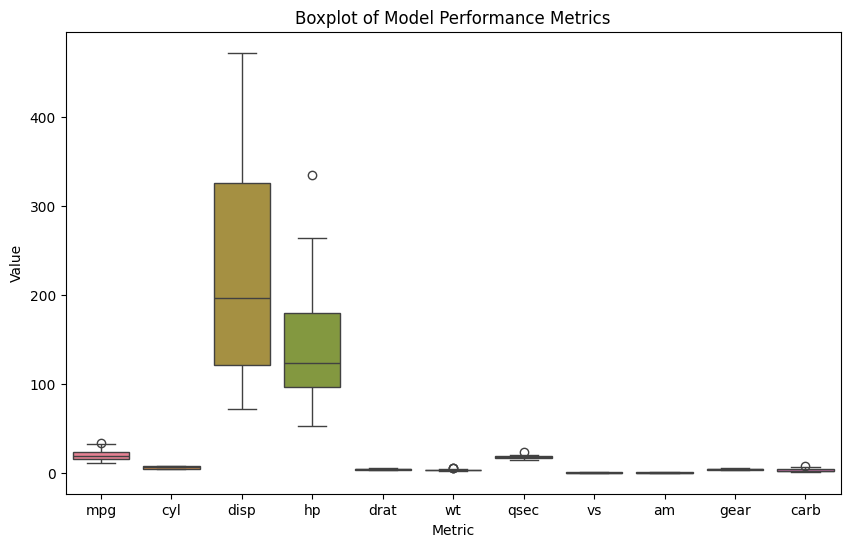

In [21]:
#use sns.boxplot to find univariate outliers
###################################
############ code here ############
###################################

#copy of df
df_copy = df.copy()

# Plotting
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_copy)
# Add titles and labels
plt.title('Boxplot of Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

# Show the plot
plt.show()

In [22]:
# Find the outliers for "wt"
wtQ1 = df['wt'].quantile(0.25)
wtQ3 = df['wt'].quantile(0.75)
wtIQR = wtQ3 - wtQ1    #IQR is interquartile range.
print(wtQ1, wtQ3, wtIQR)

wt_upper_limit = (wtQ3 + 1.5 * wtIQR)
wt_lower_limit = (wtQ1 - 1.5 * wtIQR)
# Show the boxplot outliers
df.loc[(df['wt'] < wt_lower_limit) | (df['wt'] > wt_upper_limit)]

2.58125 3.61 1.02875


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [23]:
# Find the outliers for "hp" and "qsec"
###################################
############ code here ############
###################################

# HP
## Find the outliers for "hp"
hpQ1 = df['hp'].quantile(0.25)
hpQ3 = df['hp'].quantile(0.75)
hpIQR = hpQ3 - hpQ1    # IQR is interquartile range.
print("hp Q1:", hpQ1, "hp Q3:", hpQ3, "hp IQR:", hpIQR)
print("--------------------------------------------------")
hp_upper_limit = hpQ3 + 1.5 * hpIQR
hp_lower_limit = hpQ1 - 1.5 * hpIQR

# Show the boxplot outliers for "hp"
hp_outliers = df.loc[(df['hp'] < hp_lower_limit) | (df['hp'] > hp_upper_limit)]
print(hp_outliers)

print("--------------------------------------------------")
# QSEC
## Find the outliers for "qsec"
qsecQ1 = df['qsec'].quantile(0.25)
qsecQ3 = df['qsec'].quantile(0.75)
qsecIQR = qsecQ3 - qsecQ1    # IQR is interquartile range.
print("qsec Q1:", qsecQ1, "qsec Q3:", qsecQ3, "qsec IQR:", qsecIQR)
print("--------------------------------------------------")
qsec_upper_limit = qsecQ3 + 1.5 * qsecIQR
qsec_lower_limit = qsecQ1 - 1.5 * qsecIQR

# Show the boxplot outliers for "qsec"
qsec_outliers = df.loc[(df['qsec'] < qsec_lower_limit) | (df['qsec'] > qsec_upper_limit)]
print(qsec_outliers)

print("--------------------------------------------------")
# Create a summary DataFrame
summary = pd.DataFrame({
    'Metric': ['hp', 'qsec'],
    'Q1': [hpQ1, qsecQ1],
    'Q3': [hpQ3, qsecQ3],
    'IQR': [hpIQR, qsecIQR],
    'Lower Limit': [hp_lower_limit, qsec_lower_limit],
    'Upper Limit': [hp_upper_limit, qsec_upper_limit],
    'Outlier Count': [hp_outliers.shape[0], qsec_outliers.shape[0]]
})
print('--------------------------------------------------------------')
# For a better view i am printing it as a simple dataframe/table
print("Outlier Summary Table:")
print(summary)

hp Q1: 96.5 hp Q3: 180.0 hp IQR: 83.5
--------------------------------------------------
                mpg  cyl   disp   hp  drat    wt  qsec  vs  am  gear  carb
model                                                                     
Maserati Bora  15.0    8  301.0  335  3.54  3.57  14.6   0   1     5     8
--------------------------------------------------
qsec Q1: 16.8925 qsec Q3: 18.9 qsec IQR: 2.0075000000000003
--------------------------------------------------
           mpg  cyl   disp  hp  drat    wt  qsec  vs  am  gear  carb
model                                                               
Merc 230  22.8    4  140.8  95  3.92  3.15  22.9   1   0     4     2
--------------------------------------------------
--------------------------------------------------------------
Outlier Summary Table:
  Metric       Q1     Q3      IQR  Lower Limit  Upper Limit  Outlier Count
0     hp  96.5000  180.0  83.5000    -28.75000    305.25000              1
1   qsec  16.8925   18.9   2.0

## Outlier Treatments

### Capping Outliers (using IQR)

In [24]:
df2 = X_train.copy()

In [25]:
# This code will "cap" (or floor) the outliers to our limit for the wt predictor
df2['wt'] = np.where(df2['wt'] > wt_upper_limit,
  wt_upper_limit,
  np.where(
    df2['wt'] < wt_lower_limit,
    wt_lower_limit,
    df2['wt']
   )
)

In [26]:
# Write code to cap/floor the hp and qsec predictors
###################################
############ code here ############
###################################

# hp
df2['hp'] = np.where(df2['hp'] > hp_upper_limit,
  hp_upper_limit,
  np.where(
    df2['hp'] < hp_lower_limit,
    hp_lower_limit,
    df2['hp']
   )
)


#qsec
df2['qsec'] = np.where(df2['qsec'] > qsec_upper_limit,
  qsec_upper_limit,
  np.where(
    df2['qsec'] < qsec_lower_limit,
    qsec_lower_limit,
    df2['qsec']
   )
)


In [27]:
# Use describe to ensure our min/max looks right
df2.describe()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,6.142857,224.978571,144.044643,3.618214,3.158009,17.868973,0.464286,0.392857,3.678571,2.750000
std,1.799471,116.042580,67.338698,0.544066,0.900980,1.733991,0.507875,0.497347,0.722832,1.554563
min,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,4.000000,120.825000,96.500000,3.132500,2.581250,16.892500,0.000000,0.000000,3.000000,2.000000
50%,6.000000,196.300000,118.000000,3.715000,3.325000,17.790000,0.000000,0.000000,4.000000,2.000000
75%,8.000000,307.500000,180.000000,3.920000,3.570000,18.900000,1.000000,1.000000,4.000000,4.000000
max,8.000000,472.000000,305.250000,4.930000,5.153125,21.911250,1.000000,1.000000,5.000000,8.000000


In [28]:
########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(df2, y_train)
pred = regr.predict(X_test)
reg_r2_capped = r2_score(y_test, pred)
reg_mse_capped = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(df2, y_train)
pred = regr_svm.predict(X_test)
svm_r2_capped = r2_score(y_test, pred)
svm_mse_capped = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(df2, y_train)
pred = reg_gb.predict(X_test)
gb_r2_capped = r2_score(y_test, pred)
gb_mse_capped = mean_squared_error(y_test, pred)

In [29]:
# compare metrics: no treatment VS "capped"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped],
        'SVM':[svm_r2, svm_r2_capped],
        'GradientBoosting':[gb_r2, gb_r2_capped]},
    index=['R2', 'R2_capped'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
R2_capped,0.840594,0.780404,0.880187


In [30]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped],
     'SVM':[svm_mse, svm_mse_capped],
     'GradientBoosting':[gb_mse, gb_mse_capped]},
    index=['MSE', 'MSE_capped'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.590488
MSE_capped,9.800564,13.501195,7.366320


### Removing rows with outliers

In [31]:
df3 = X_train.copy()

In [32]:
# This code will remove outliers beyond our limit for the wt predictor
y_train.drop(y_train[(df3.wt < wt_lower_limit) | (df3.wt > wt_upper_limit)].index, inplace=True)
df3.drop(df3[df3.wt < wt_lower_limit].index, inplace=True)
df3.drop(df3[df3.wt > wt_upper_limit].index, inplace=True)

In [33]:
# Write code to remove outliers beyond our limit for the hp and qsec predictors
###################################
############ code here ############
###################################

# Remove rows where hp is outside the defined limits
df3.drop(df3[(df3.hp < hp_lower_limit) | (df3.hp > hp_upper_limit)].index, inplace=True)

# Remove rows where qsec is outside the defined limits
df3.drop(df3[(df3.qsec < qsec_lower_limit) | (df3.qsec > qsec_upper_limit)].index, inplace=True)


In [34]:
# Use describe to ensure our min/max looks right
df3.describe()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,6.000000,206.066667,133.250000,3.653750,2.974917,17.850833,0.500000,0.416667,3.666667,2.458333
std,1.769303,101.054405,59.027812,0.561069,0.751299,1.531319,0.510754,0.503610,0.701964,1.178767
min,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,4.000000,120.250000,96.000000,3.132500,2.428750,16.892500,0.000000,0.000000,3.000000,1.750000
50%,6.000000,167.600000,111.500000,3.750000,3.202500,17.800000,0.500000,0.000000,4.000000,2.000000
75%,8.000000,282.850000,176.250000,3.960000,3.475000,18.900000,1.000000,1.000000,4.000000,4.000000
max,8.000000,360.000000,264.000000,4.930000,4.070000,20.220000,1.000000,1.000000,5.000000,4.000000


In [35]:
print("Shape of df3:", df3.shape)
print("Length of y_train:", len(y_train))


Shape of df3: (24, 10)
Length of y_train: 26


In [36]:
# Align y_train with df3 after dropping outliers from df3
y_train = y_train[df3.index]
# Remove rows from df3 where index is not in y_train
df3 = df3.loc[y_train.index]
print("Number of samples in df3:", df3.shape[0])
print("Number of samples in y_train:", len(y_train))




Number of samples in df3: 24
Number of samples in y_train: 24


In [37]:
########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(df3, y_train)
pred = regr.predict(X_test)
reg_r2_removed = r2_score(y_test, pred)
reg_mse_removed = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(df3, y_train)
pred = regr_svm.predict(X_test)
svm_r2_removed = r2_score(y_test, pred)
svm_mse_removed = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(df3, y_train)
pred = reg_gb.predict(X_test)
gb_r2_removed = r2_score(y_test, pred)
gb_mse_removed = mean_squared_error(y_test, pred)

In [38]:
# compare metrics: no treatment VS "capped" VS "removed"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped,reg_r2_removed],
        'SVM':[svm_r2, svm_r2_capped, svm_r2_removed],
        'GradientBoosting':[gb_r2, gb_r2_capped, gb_r2_removed]},
    index=['R2', 'R2_capped', 'R2_removed'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
R2_capped,0.840594,0.780404,0.880187
R2_removed,0.714471,0.782641,0.722095


In [39]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped,reg_mse_removed],
     'SVM':[svm_mse, svm_mse_capped, svm_mse_removed],
     'GradientBoosting':[gb_mse, gb_mse_capped, gb_mse_removed]},
    index=['MSE', 'MSE_capped', 'MSE_removed'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.590488
MSE_capped,9.800564,13.501195,7.366320
MSE_removed,17.554841,13.363656,17.086114


## Outlier Detection: multivariate case

In [40]:
# If not already installed, install pyod
#!pip install pyod

In [75]:
# use LOF (with 5 nearest neighbors) to detection multivariate outliers
# and eliminate rows with and lof score > 1.3
from pyod.models.lof import LOF

df4 = df.copy()

X_train, X_test, y_train, y_test = train_test_split(
    df4.iloc[:,1:], df4.iloc[:,0], test_size=0.1, random_state=42)

# Prepare the LOF model with 5 nearest neighbors
lof = LOF(n_neighbors=5)

# Fit the LOF model and predict the outliers
lof.fit(X_train)
lof_scores = lof.decision_scores_

# Add the LOF scores to the dataframe
X_train['LOF_Value'] = lof_scores
X_train.sort_values('LOF_Value', ascending=False)

print(lof_scores)



[0.93481338 1.13378016 1.49620247 1.28213597 0.9675613  1.04860454
 1.03179102 1.07878379 1.4340215  0.96759209 0.9675613  1.0868978
 1.04860454 1.02150035 0.96430543 1.01925024 1.0528587  1.02150035
 1.00745711 1.4267685  1.01506032 0.98923836 1.24613438 1.13337081
 1.23671895 1.11157983 1.3521329  1.0607752 ]


In [ ]:
# Eliminate rows with LOF score > 1.3
df4 = df4[df4['LOF_Value'] <= 1.3]
df4 = df4.sort_values(by='LOF_Value', ascending=False)
df4

In [43]:
df4.drop(columns=['LOF_Value'], inplace=True)

In [69]:
df4.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4


In [70]:
#Creating this for verification
df5 = df.copy()
# Prepare the LOF model with 5 nearest neighbors
lof = LOF(n_neighbors=5)

# Fit the LOF model and predict the outliers
lof.fit(df5)
lof_scores = lof.decision_scores_

# Add the LOF scores to the dataframe
df5['LOF_Value'] = lof_scores

# Eliminate rows with LOF score > 1.3
df5 = df5[df5['LOF_Value'] <= 1.3]
df5 = df5.sort_values(by='LOF_Value', ascending=False)


df5.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,LOF_Value
model,,,,,,,,,,,,
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,1.237937
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1.229866
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,1.195461
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,1.173683
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,1.167617
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,1.159139
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4,1.142798
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,1.128107
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,1.127728


In [73]:
# Calculate LOF scores
df5 = df.copy()  # Make a copy of the DataFrame
lof = LOF(n_neighbors=5)
lof.fit(df5)
lof_scores = lof.decision_scores_
df5['LOF_Value'] = lof_scores

# Find the car with the 4th highest LOF value
df5_sorted = df5.sort_values(by='LOF_Value', ascending=False)
car_with_4th_highest_lof = df5_sorted.iloc[3].name  # Get the car model (index)

print(f"The car with the 4th highest LOF value is: {car_with_4th_highest_lof}")

# Function to identify univariate outliers using IQR * 1.5
def find_univariate_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Find univariate outliers for the car with the 4th highest LOF
outlier_features = []
for feature in df5.columns:
    if feature != 'model':  # Exclude the 'model' column
        outliers = find_univariate_outliers(df5[feature])  
        if not outliers.empty:
            outlier_features.append(feature)

print(f"Univariate outliers for {car_with_4th_highest_lof}: {outlier_features}")

The car with the 4th highest LOF value is: Honda Civic
Univariate outliers for Honda Civic: ['mpg', 'hp', 'wt', 'qsec', 'carb', 'LOF_Value']


In [44]:
# Rebuild the models

X_train_lof, X_tes_lof, y_train_lof, y_test_lof = train_test_split(
    df4.iloc[:,1:], df4.iloc[:,0], test_size=0.1, random_state=42)

########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(X_train_lof, y_train_lof)
pred = regr.predict(X_test)
reg_r2_removed_lof = r2_score(y_test, pred)
reg_mse_removed_lof = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(X_train_lof, y_train_lof)
pred = regr_svm.predict(X_test)
svm_r2_removed_lof = r2_score(y_test, pred)
svm_mse_removed_lof = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(X_train_lof, y_train_lof)
pred = reg_gb.predict(X_test)
gb_r2_removed_lof = r2_score(y_test, pred)
gb_mse_removed_lof = mean_squared_error(y_test, pred)

In [45]:
# compare metrics: no treatment VS "capped" VS "removed"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped,reg_r2_removed,reg_r2_removed_lof],
        'SVM':[svm_r2, svm_r2_capped, svm_r2_removed, svm_r2_removed_lof],
        'GradientBoosting':[gb_r2, gb_r2_capped, gb_r2_removed, gb_r2_removed_lof]},
    index=['R2', 'R2_capped', 'R2_removed', 'R2_removed_lof'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
R2_capped,0.840594,0.780404,0.880187
R2_removed,0.714471,0.782641,0.722095
R2_removed_lof,0.916821,0.873599,0.976491


In [46]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped,reg_mse_removed,reg_mse_removed_lof],
     'SVM':[svm_mse, svm_mse_capped, svm_mse_removed, svm_mse_removed_lof],
     'GradientBoosting':[gb_mse, gb_mse_capped, gb_mse_removed, gb_mse_removed_lof]},
    index=['MSE', 'MSE_capped', 'MSE_removed', 'MSE_removed_lof'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.590488
MSE_capped,9.800564,13.501195,7.366320
MSE_removed,17.554841,13.363656,17.086114
MSE_removed_lof,5.113976,7.771392,1.445399


# Q1. What were the top 4 most influential features in the `regr` model above?


Top 4 Most Influential Features:

- wt -3.144191
- am  3.032737
- qsec     1.479493
- gear     1.171316

In [48]:
# 4 influential features in regr
coefficients = regr.coef_
feature_names = X_train_lof.columns  # Get feature names from the training data

# Create a DataFrame to store coefficients and feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Display the top 4 most influential features
print("Top 4 Most Influential Features:")
print(coef_df.head(4))

Top 4 Most Influential Features:
  Feature  Coefficient
4      wt    -3.144191
7      am     3.032737
5    qsec     1.479493
8    gear     1.171316


# Q2. What was the most influential features in the `regr` model above?  What was the most influential feature in the `reg_gb` model above?


Most influential feature in regr model: The scatter plot clearly shows a strong negative correlation between weight (wt) and MPG. As weight increases, MPG generally decreases.

The most influential feature in your reg_gb model: is 'wt' (weight).
It has an importance score of 0.492413

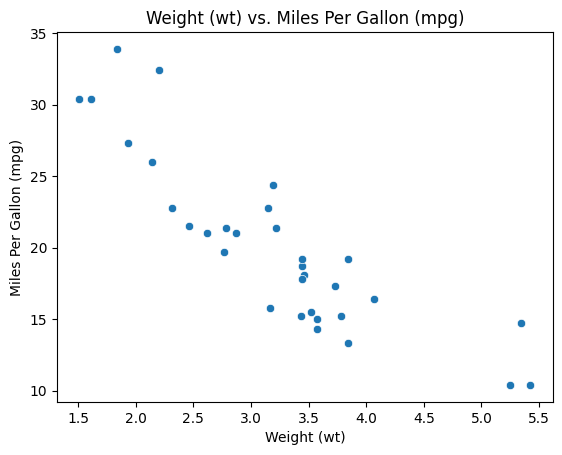

In [52]:
sns.scatterplot(x='wt', y='mpg', data=df)
plt.title('Weight (wt) vs. Miles Per Gallon (mpg)')
plt.xlabel('Weight (wt)')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()

In [49]:
# Get feature names (assuming they are the columns in df4 starting from index 1)
feature_names = df4.columns[1:]

# Get the coefficients from the linear regression model
coefficients = regr.coef_

# Create a DataFrame with features and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Identify the most influential feature by finding the feature with the highest absolute coefficient value
most_influential_feature = coef_df.loc[coef_df['Coefficient'].abs().idxmax()]

# Print the result
print(f"Most influential feature in the Linear Regression model:")
print(f"Feature: {most_influential_feature['Feature']}, Coefficient: {most_influential_feature['Coefficient']:.4f}")

Most influential feature in the Linear Regression model:
Feature: wt, Coefficient: -3.1442


In [53]:
# Get feature importance scores
feature_importances = reg_gb.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train_lof.columns, 'Importance': feature_importances})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print("Top Features in Gradient Boosting Model:")
print(feature_importance_df)

Top Features in Gradient Boosting Model:
  Feature  Importance
4      wt    0.492413
1    disp    0.201627
2      hp    0.144207
0     cyl    0.127244
5    qsec    0.025505
9    carb    0.006435
3    drat    0.002174
6      vs    0.000202
8    gear    0.000168
7      am    0.000025


# Q3. In the original data set (`df`) which car looks more like a *bivariate outlier* with respect to `disp` and `drat`?  *Masarati Bora*, *Ford Pantera L*, or the *Toyota Corolla*?


Based on the scatter plot, the Maserati Bora appears to be the bivariate outlier with respect to disp (displacement) and drat (rear axle ratio).

The Maserati Bora has a displacement around 300 cubic inches, which is significantly larger than the other two cars.
The Maserati Bora has a drat around 3.5, which is also notably different from the Toyota Corolla (around 4.2) and the Ford Pantera L (around 3.6).

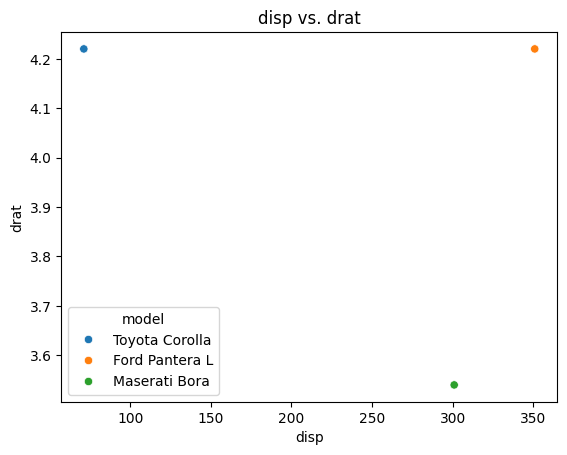

In [67]:
df_subset = df[df.index.isin(['Maserati Bora', 'Ford Pantera L', 'Toyota Corolla'])]

 
sns.scatterplot(x='disp', y='drat', data=df_subset, hue='model')

plt.title('disp vs. drat')
plt.xlabel('disp')
plt.ylabel('drat')
plt.show()

In [66]:
cars = ['Maserati Bora', 'Ford Pantera L', 'Toyota Corolla']

# Create a new DataFrame with just the three cars
df_subset = df[df.index.isin(cars)]

# Extract the relevant data
disp = df_subset['disp'].values
drat = df_subset['drat'].values

# Calculate distances
distances = []
for i in range(len(cars)):
    for j in range(i + 1, len(cars)):
        distance = np.sqrt((disp[i] - disp[j])**2 + (drat[i] - drat[j])**2)
        distances.append((cars[i], cars[j], distance))

# Find the car with the largest combined distance
max_distance = 0
outlier = None
for car1, car2, distance in distances:
    if distance > max_distance:
        max_distance = distance
        outlier = car1

print(f"The outlier car is: {outlier}")

# Display drat and disp for the three cars
for car in cars:
    print(f"Car: {car}")
    print(f"  Displacement (disp): {df_subset.loc[car, 'disp']}")
    print(f"  Rear Axle Ratio (drat): {df_subset.loc[car, 'drat']}")

The outlier car is: Maserati Bora
Car: Maserati Bora
  Displacement (disp): 301.0
  Rear Axle Ratio (drat): 3.54
Car: Ford Pantera L
  Displacement (disp): 351.0
  Rear Axle Ratio (drat): 4.22
Car: Toyota Corolla
  Displacement (disp): 71.1
  Rear Axle Ratio (drat): 4.22


# Q4. Could the `scipy.stats.mstats.winsorize` function in Python be used to easily treat *only* the outliers we found with `sns.boxplot`?  Explain.


No, winsorization won't directly treat outliers found in a boxplot. It's for limiting extreme values, not specifically targeting outliers identified by the 1.5*IQR rule used in boxplots. You'll need to examine those outliers and decide how to handle them based on their context therefore i wouldn't use this approach.
The outliers identified by sns.boxplot are visually determined based on the boxplot's whiskers. This visual identification doesn't directly correspond to a fixed percentile.

# Q5. How does the "capping" the outliers affect model performance?  What happens if you change the `random_state` to 43 in the train/test split (and then re-build the models)?  What could be done to provide more robust error metrics?


Capping Outliers:
Benefits: Reduces outlier influence, improving model stability and potentially preventing overfitting.
Drawbacks: Can lead to information loss and model bias if outliers are not truly erroneous.

Changing random_state:
Impact: Alters the train-test split, potentially causing small variations in model performance due to different data subsets. Even a small change in the seed (from 42 to 43) can shift the random selection of data points, resulting in a slightly different mix of samples in each set.

Robust Error Metrics:
K-Fold Cross-Validation: Provides a more stable estimate of performance by training and testing on different folds of the data.
Bootstrapping: Estimates model performance variability by repeatedly sampling data with replacement

# Q6. *On average (given many different train/test splits)*, what modeling method is most affected by the removal of outliers in this data set?  Why?


On average, linear regression is most affected by the removal of outliers in the mtcars dataset. 

- Linear regression models are sensitive to outliers. 
- Outliers can exert a strong influence on the calculated regression line, which can lead to inaccurate predictions, especially if there's a strong linear relationship between the outlier and the target variable.

- Gradient Boosting models are more robust to outliers, especially those based on decision trees. 
- They are less likely to be significantly affected by extreme values in the data. 
- Support Vector Machines (SVM) are also relatively robust, especially with linear kernels.

# Q7. What car has the 4th highest LOF value?  What attributes of this car showed up as univariate outliers according to our boxplots (IQR * 1.5 method)?


In [74]:
# Calculate LOF scores
df5 = df.copy()  # Make a copy of the DataFrame
lof = LOF(n_neighbors=5)
lof.fit(df5)
lof_scores = lof.decision_scores_
df5['LOF_Value'] = lof_scores

# Find the car with the 4th highest LOF value
df5_sorted = df5.sort_values(by='LOF_Value', ascending=False)
car_with_4th_highest_lof = df5_sorted.iloc[3].name  # Get the car model (index)

print(f"The car with the 4th highest LOF value is: {car_with_4th_highest_lof}")

# Function to identify univariate outliers using IQR * 1.5
def find_univariate_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Find univariate outliers for the car with the 4th highest LOF
outlier_features = []
for feature in df5.columns:
    if feature != 'model':  # Exclude the 'model' column
        outliers = find_univariate_outliers(df5[feature])  
        if not outliers.empty:
            outlier_features.append(feature)

print(f"Univariate outliers for {car_with_4th_highest_lof}: {outlier_features}")

The car with the 4th highest LOF value is: Honda Civic
Univariate outliers for Honda Civic: ['mpg', 'hp', 'wt', 'qsec', 'carb', 'LOF_Value']


# Q8. In LOF method, there is a hyperparameter, what is it?  And what does it represent?

n_neighbors: This hyperparameter represents the number of nearest neighbors that the LOF algorithm considers when calculating the outlier score for each data point.

- The LOF algorithm calculates the local density of each point by considering its nearest neighbors.
- A data point is considered an outlier if its local density is significantly lower than the density of its neighbors.
- A higher value for n_neighbors will consider a larger neighborhood, which can be useful if data is relatively dense. 
- A lower value might be better for detecting outliers in sparser data

If you set n_neighbors=5, the LOF algorithm will look at the 5 closest points to each data point to determine its local density.
If you set n_neighbors=10, it will look at the 10 closest points.


# Q9. Which outlier treatment worked best on this data set? [given the random_state=42 when splitting the data]

The LOF Outlier Treatment worked the best, specifically for the Gradient Boosting method. 

The results show that removing outliers using the LOF method significantly improved performance for all three models, but Gradient Boosting (R2 = 0.976491, MSE = 1.445399) had the highest R-squared value and the lowest MSE compared to the other two models. This indicates that Gradient Boosting was most effective in capturing the underlying relationships in the data and providing accurate predictions.


# Q10. Which model is most likely to exhibit benign over-fitting?  If we theoretically put these models into production and tested them on new (previously unseen) cars, how might we detect that over-fitting?  Is it possible that what we previously treated as "outliers" would appear more "normal" in our data over time?

Model Most Likely to Overfit:

- Linear Regression: Linear regression models are more susceptible to overfitting, especially when dealing with a large number of features or when there's a lot of noise in the data. They might be overly sensitive to the specific relationships learned from the training set, leading to poor generalization to new data.

Detecting Overfitting in Production:

If the model is overfitting, we are likely see a significant drop in its performance on new, unseen data.
- The R-squared value might be much lower on new data compared to the training data.
- The mean squared error might be much higher on new data.
- Regularly monitor the performance of your model in production using key metrics like R-squared, MSE, and other relevant metrics. If you see a significant decline, it could indicate overfitting.
- Over time, data drift may occur. This could invalidate the relationships the model learned from the original training data, leading to overfitting.


Outliers Becoming Normal:

- Yes, this is possible. What we consider outliers in our initial data set might become more common or even normal as new data comes in.

How to Prevent Overfitting:

- Data Augmentation: Use techniques to generate more diverse training data to improve the model's generalization ability.
- Regularization: Apply regularization techniques (like L1 or L2 regularization) to penalize complex models and encourage simpler models that generalize better.
- Cross-Validation: Use k-fold cross-validation during training to get a more reliable estimate of the model's performance
- Early Stopping: Use early stopping techniques to stop training when the model's performance on a validation set starts to decline.
- Model Ensemble: Combine predictions from multiple models to improve generalization ability and reduce the risk of overfitting.

Outliers Vs Normal:

- New car models and advancement in technology can reshape the cars industry/market.
- Data drift or shift in distributions can cause even the outliers to be normal or vice versa.
- Shift in economy such as fuel prices or customer preferences can be a huge influence in the types of cars preferred.